In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import SpectralClustering
from scipy.sparse import csgraph
from numpy import linalg as LA

import networkx as nx 

## Create Mock Data

In [2]:
# Undirected-Graph
# Interaction between Crews
adj = [
[0,1,1,0,124,1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,57],
[1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,64,0,0,0,0,0],
[124,0,0,1,0,1,1,0,0,45,0,0,0],
[1,0,0,1,1,0,0,0,0,0,0,0,34],
[1,0,0,0,1,0,0,0,1,0,0,0,0],
[0,0,0,64,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,1,0,0,0,0,0,0],
[0,0,0,0,45,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1],
[0,57,0,0,0,34,0,0,0,1,0,1,0]]

In [3]:
adj = np.array(adj)

In [4]:
adj == adj.T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

In [5]:
G = nx.from_numpy_matrix(adj)

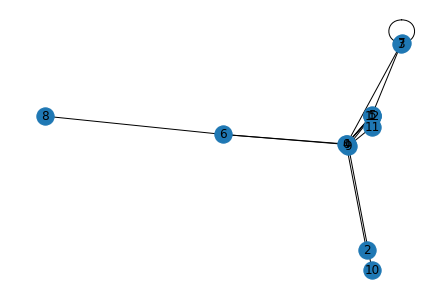

In [6]:
nx.draw(G, pos=nx.spectral_layout(G), with_labels=True)
plt.show()

In [7]:
def eigenDecomposition(A, plot = True, topK = 5):
    L = csgraph.laplacian(A, normed=True) # Compute Laplacian Matrix
    n_components = A.shape[0] # number of employees
    
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

Optimal number of clusters [ 3  8 10  1 12]


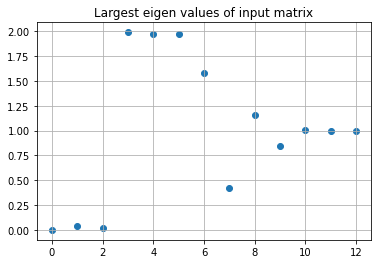

In [8]:
k, _,  _ = eigenDecomposition(adj)
print(f'Optimal number of clusters {k}')

In [10]:
clustering = SpectralClustering(n_clusters = k[0]).fit(adj)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:590: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  "The spectral clustering API has changed. ``fit``"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [11]:
clustering.labels_

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
color_lst = ['blue', 'red', 'green', 'orange', 'purple']

In [ ]:
nx.draw_networkx_nodes(G, nx.spectral_layout(G),
                      nodelist= clustering.labels_ == idx ,  
                      node_color= color,
                      node_size=10)

In [26]:
clustering.labels_

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
clustering.labels_ == 0

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [29]:
np.where((clustering.labels_ == 0) == True)

(array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12]),)

In [34]:
color_lst

['blue', 'red', 'green', 'orange', 'purple']

In [36]:
# for idx, (node, color) in enumerate(zip(range(k[0]) , color_lst)):
#   print(f"{idx} {node}, {color}")
#   nx.draw_networkx_nodes(G, nx.spectral_layout(G),
#                         nodelist= list(np.where((clustering.labels_ == idx) == True)) ,  
#                         node_color= color,
#                         node_size=100)
# plt.show()